# Experiment 1 Data Processing

Today we're going to use Python to calculate some basic descriptive statisics, graph an external calibration curve and solve for your unknown NaCl concentration.

Right now, all of this code is going to look like greek! Read it carefully, and try to follow the logic, but don't get too bogged down in the details. By the end of the semester, you will clearly understand everything you are seeing here! For now, let's just take a look at what Python can do!

## Average, Standard Deviation and Confidence Interval:

In [1]:
# First, pool the unknown density data from your bench into one data array we'll call "NaCl_unk":
NaCl_unk=[1,2,1,2,1]

#find the average and the standard deviation for water_data (feel free to copy and paste from code blocks above
#but be careful to update anything you might need to change!) 
import scipy.stats as stats
average_NaCl = stats.tmean(NaCl_unk)
s_NaCl = stats.tstd(NaCl_unk)

print ("the average density is " + str(average_NaCl) + " +/- " + str(s_NaCl) + " g/mL3")

the average density is 1.4 +/- 0.5477225575051661 g/mL3


<b> Whoa, thats a lot of digits! </b> That can't possibly be the right number of significant digits, right? Remember that the computer only knows how to do what you tell it to do! So if you don't tell it to round to a certain number of digits, it will just give you everything it has stored. So lets figure out how to round those numbers to something a little more reasonable.

### The New Rules For Sig. Figs:

1. Round your measured value to the first significant digit of the uncertainty attached to it (standard deviation, confidence interval, tolerance, etc.)
2. Uncertainty values have <b> one </b> sig. fig, unless they start with a 1, in which case you may keep one additional digit.

So what place should we round your average density off to?



In [9]:
#Rounding numbers
# try out different values of i until you get an output that looks right!
i = 15
s_NaCl_out = round(s_NaCl,i)
average_NaCl_out = round(average_NaCl,i)

print ("the average density is " + str(average_NaCl_out) + " +/- " + str(s_NaCl_out) + " g/mL3")

the average density is 1.4 +/- 0.547722557505166g/mL3


Be sure to report the correct average and standard deviation to the correct number of sig figs in your lab notebook!

### How to calculate a confidence interval

The equation for confidence interval is  $ CI= {\frac {ts}{\sqrt {n}}} $ We already know how to get n (from the length of the array!) and you already calculated s! So now we just need t. Luckily, Python has those t-tables from your text book, we just have to tell it which one we need! See the code below:

In [11]:
import math

#the first input is confidence %, the second is degrees of freedom (n-1)
t = stats.t.ppf(0.95, len(NaCl_unk)-1)

CI_NaCl = s_NaCl*t/math.sqrt(len(NaCl_unk))


print ("the average density is " + str(average_NaCl) + " +/- " + str(CI_NaCl) + " g/mL3")

the average density is 1.4 +/- 0.5221936824068574g/mL3


This code was written for a 95% confidence interval. Try it out for 90 % and 50 % too! Record all three values in your lab notebook, and be sure to explain the trend!

##  The Grubbs test or how to discard outliers
Now you have the average and the standard deviation of your data. Do you think there might be any outliers? Any values which seem really far away from your mean, and which you think might be the result of a systemattic error (the empty flask was still wet) or a mistake, rather than just random variation?

We can't just go throwing data points out  because we think they look funky. But we can try a statistic test to see how likely it is that the data point we're suspicious about came from our data set. This test is a called a <b> Grubb's test </b>

First, we must calculate a G value for our data, using our average ($ {\bar  {x}} $ ), our standard deviation (s) and our most likely ourlier ( $ x_{i} $ ). We will plug those values into the following equation: $ G={\frac {\left\vert x_{i}-{\bar  {x}}\right\vert }{s}} $

We then must compare our G value to a 'G critical' value, which we must look up in a table. Our null hypothesis is that our calculated G value will be less than the 'G critical' value, and that our value is NOT an outlier. Only if our calculated G value is greater than a G critical value, can we discard that value as an outlier.

<b> Before you continue, answer the following questions </b>
1. Look at your water density data and pick a likely outlier. Explain why you think it is possibly an outlier.


2. Calculate G for your suspected outlier. 


3. Look up G critical, and compare it to your calculated G. Is this value an outlier, or not?

### Programming the Grubbs test with Python

We can write programs which make decisions for us, if we can correctly communicate the criteria of the decision. This turns out to be great for statical tests like the Grubbs test. But, to do this, we typically have to structure the descision in the form of an "if-then statement". For example, "if G calculated is greater than G critical, the data point is an outlier, and can be discarded"

In [15]:
# Python doesn't happen to have an easy look-up for the Grubb's critical values, so just enter the one you looked up as G_crit:
G_crit = 

# enter your suspect value here
suspect = 

G_calc = abs(suspect - average_NaCl)/s_NaCl

if G_calc < G_crit:
    print (str(suspect) + " is not an outlier!")
if G_calc > G_crit:
    print (str(suspect) + " is an outlier and should be removed from the data!")


16 is an outlier and should be removed from the data!


Again, be sure to include this result in your ELN, with an explanation of what you've done here! If you need to remove an outlier, do so now, and be sure to recalculate your average, standard deviation and confidence interval without it!


# Determining the unknown concentration
Now we've done some desciriptive statistics on the density of your unknown, but we don't yet have any idea what the unknown concentraion is. But we have all of those lovely standard solutions, with known concentrations, and we know their densities!

## Making a graph:

Text(0,0.5,'other numbers (unit mcunitface)')

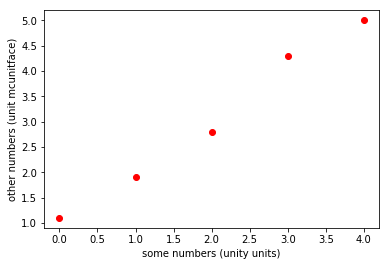

In [4]:
import matplotlib.pyplot as plt


# sample data, replace with your own data please!

concentration = [0, 1, 2, 3, 4]
density = [1.1,1.9,2.8,4.3,5]



# put together a graph using the plot command
# in 'plot', first comes the x axis, then the y, then 'ro' plots our points as red circles. 
fig, plot1 = plt.subplots()
plot1.plot(concentration, density, 'ro')

# Add labels on the x and y axis, always including units.
plot1.set_xlabel("some numbers (unity units)")
plot1.set_ylabel("other numbers (unit mcunitface)")



#this command shows the figure in the script here. Later we will discuss how to export this plot as an image file, when needed.
#for now though, lets just take a look!
#hit run on this block of code!

#fig.savefig("myfirstpythonfigure.png")

Now you should see a figure above with red dots making the data points, along with some very unhelful axis labels. 

1. Go back into the code and put your own data into the concentration and density arrays, including the correctnumber of sig. figs. for both density and concentration.

2. Update the axis labels to something that is actually properly descriptive for your data

3. In the plt.plot command, change 'ro' to 'bs'.

4. Hit RUN again to rerun this code now that you have updated it.

You should now have a plot of your real data, with useful axis labels letting you know that density is on the y axis, and concentration is on the x axis. Hopefully, your data looks fairly linear! 

The next thing you need to do is to export that plot so you can put it in your lab notebook! You have a few choices; you can take a screenshot and paste the image into Lab Archives, or you use Python's built in export too. Copy the following line of code into the block above, and re-run the block

fig.savefig("myfirstpythonfigure.png")


A figure called "myfirstpythonfigure" should now be in the same folder you saved this Jupyter notebook in! You can upload it to your lab notebook as an attachment, as usual.

## Finding the equation of the line:

Now we'll do something called a linear regression (we'll get into more detail on this later in the course) to figure out the slope and intercept of a straight line that seems to fit your data:

In [20]:

# the linear regression function in the scipy stats module returns 5 values: slope, intercept, R-squared and then two uncertainty values p and s_m
# we'll ignore the last two for the moment, since all we really need right now is the equation of the line

m, b, R2, p, s_m = stats.linregress(concentration, density)

print ('the equation of the line is y = ' + str(m) + 'x + ' + str(b) + ' and its R-squared value is '+ str(R2))

the equation of the line is y = 1.02x + 0.98 and its R-squared value is 0.9931506043228762


Using the equation above, calculate your unknown concentration by hand first. Then complete the code below to calculate the unknown concentration. Make sure your hand-written calculation and your python code are producing the same result!

In [22]:
#Add the density of your unknown here:

 unknown_NaCl = 

# now using m, b and unknown_density, we solve for unknown_concentration
unknown_concentration = (unknown_NaCl - b)/m

print ('the concentration of the unknown is ' + str(unknown_concentration) + ' M')

#do your values match? If not, check your math!

the concentration of the unknown is 0.41176470588235287 M


Record this value to the number of sig figs determined by your standard deviation and confidence intervals earlier. Don't forget to add a conclusion to your ELN page!

Now you have a fully completed python program for calculaing averages, standard deviations and confidence intervals, and for using an external calibration curve to determing the concentration of an unknown.

You can reuse any of this code in later labs, whenever you need to repeat any of these functions! This is the real beauty of a programming language like Python; keep copys of all of your completed Jupyter notebooks, and copy-paste anytime you want to reuse something!
